1. Install and Import Dependencies

In [9]:
#Installation of the PyTorch 

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [10]:
#Clonning the YoLo5 Form the Ultralytics 

!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [11]:
#Installing the requirements for the YoLoV5 

!cd yolov5 & pip install -r requirements.txt

In [3]:
#importing the libraries

import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [14]:
#Pre-Trained YoLov5 Model Load 

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-14 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [16]:
#Cheacking the Model is Load or not 

model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make Detections with Images

In [29]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [30]:
results = model(img)
results.print()

C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 481.7ms pre-process, 5.2ms inference, 33.5ms NMS per image at shape (1, 3, 448, 640)


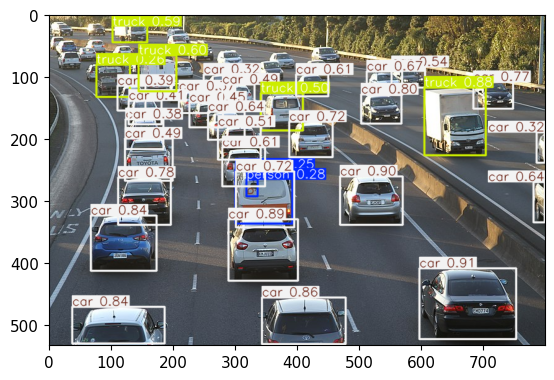

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
results.render()

[array([[[111, 101,  91],
         [111, 101,  91],
         [112, 102,  92],
         ...,
         [ 80,  72,  61],
         [ 88,  80,  69],
         [ 95,  87,  76]],
 
        [[117, 107,  97],
         [117, 107,  97],
         [118, 108,  98],
         ...,
         [ 86,  78,  67],
         [ 91,  83,  72],
         [ 95,  87,  76]],
 
        [[123, 113, 104],
         [124, 114, 105],
         [124, 114, 105],
         ...,
         [ 95,  86,  77],
         [ 97,  88,  79],
         [ 98,  89,  80]],
 
        ...,
 
        [[ 54,  53,  51],
         [ 84,  83,  81],
         [ 77,  76,  74],
         ...,
         [  4,  42, 255],
         [  4,  42, 255],
         [  4,  42, 255]],
 
        [[ 51,  46,  42],
         [ 83,  78,  74],
         [ 77,  72,  68],
         ...,
         [  4,  42, 255],
         [  4,  42, 255],
         [  4,  42, 255]],
 
        [[ 48,  41,  35],
         [ 79,  72,  66],
         [ 74,  67,  61],
         ...,
         [  4,  42, 255],
  

4. Real Time Detections

In [36]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models

5. Train from scratch

In [7]:
#Unique indenfiesr

import uuid 
import os
import time 

In [13]:
base_path = r'D:\Student Behaviour Detection'
IMAGES_PATH = os.path.join(base_path, 'data', 'images')  #data/images
labels = ['Using Phone']
number_imgs = 15

In [17]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [18]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

D:\Student Behaviour Detection\data\images\Using Phone.089232a2-baed-11ef-9910-b4325a9fe8a1.jpg


In [20]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

D:\Student Behaviour Detection\data\images\Using Phone.c68dd25c-baed-11ef-9420-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd25d-baed-11ef-acfc-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd25e-baed-11ef-9fc7-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd25f-baed-11ef-b0ff-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd260-baed-11ef-8fba-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd261-baed-11ef-b8a8-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd262-baed-11ef-aa8b-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd263-baed-11ef-a675-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd264-baed-11ef-884e-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\images\Using Phone.c68dd265-baed-11ef-97a6-b4325a9fe8a1.jpg
D:\Student Behaviour Detection\data\imag

In [25]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [28]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [59]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-389-ge62a31b6 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

6. Load Custom Model

In [65]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\vaghe/.cache\torch\hub\master.zip
YOLOv5  2024-12-15 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [66]:
img = os.path.join('data', 'images', 'Using Phone.ebb3003e-baec-11ef-934a-b4325a9fe8a1.jpg')

In [67]:
results = model(img)

C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [68]:
results.print()

image 1/1: 480x640 1 Using Phone
Speed: 7.2ms pre-process, 14.6ms inference, 55.1ms NMS per image at shape (1, 3, 480, 640)


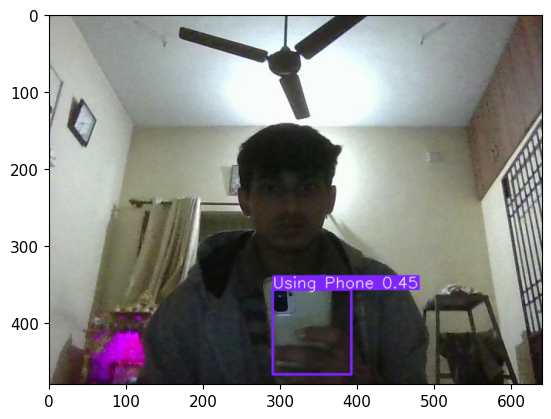

In [69]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [73]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models